## Experiments with tokenization stuff

## Preparing Tokenizer

In [4]:
from tokenizers import Tokenizer, models, trainers, pre_tokenizers, decoders

In [5]:
# tokenizer = Tokenizer(models.WordPiece())

# Create a new WordPiece tokenizer

In [6]:
# trainer = trainers.WordPieceTrainer(
#     vocab_size=50000,  # Set the vocabulary size
#     special_tokens=["[PAD]", "[CLS]", "[SEP]", "[MASK]", "[UNK]"]  # Special tokens
# )

# Training the tokenizer on a corpus

In [7]:
# tokenizer.pre_tokenizer = pre_tokenizers.Whitespace()

# Pre-tokenization (e.g., whitespace tokenization)

## Loading data

In [8]:
import pandas as pd

In [19]:
tokenizer = Tokenizer.from_file('../data/tokenizer/tokens.json')

In [10]:
df = pd.read_csv('../data/preprocessed/preprocessed.csv')

In [11]:
data = df['0'].to_list()

In [12]:
len(data)

110208

In [13]:
# tokenizer.train_from_iterator(data)

In [14]:
# tokenizer.save("../data/tokenizer/tokens.json")

# commented out to avoid accidental run

In [27]:
import numpy as np

In [51]:
def pad(tokens:list[int], sequenceLength:int):
    """
    Adds padding to vector, so it has the same length of `sequenceLength`
    """
    if len(tokens) > sequenceLength:
        raise ValueError(f"The given text should contain less than {sequenceLength} not {len(tokens)}")
    
    if len(tokens) < sequenceLength:
        tokens = np.pad(tokens, (sequenceLength-len(tokens), -1), 'constant')

    return tokens

In [22]:
def tokenize(text:str, tokenizer:Tokenizer, sequenceLength:int, shouldPad=True):
    """
    Tokenizes a text and return a matrix of shape, (n, sequenceLength)

    Here `n` is dependant on the length of text
    `n = len(tokenizer.encode(text).ids) % sequenceLength`
    """

    tokens = tokenizer.encode(text).ids

    tokens = [tokens[i:i+sequenceLength] for i in range(0, len(tokens), sequenceLength)]

    if shouldPad:
        return np.stack( list( map( lambda x: pad(x, sequenceLength), tokens ) ), axis=0)
    else:
        return tokens
    

In [25]:
tokenizedDataLengths = list(map(lambda x:len(tokenizer.encode(x).ids), data))

# seeing the maximum amout of tokens 

## Looking into the data

In [26]:
tokenizedDataLengths = np.array(tokenizedDataLengths)

In [38]:
import matplotlib.pyplot as plt

In [27]:
tokenizedDataLengths.max()

144

In [28]:
tokenizedDataLengths.min()

2

In [29]:
tokenizedDataLengths.mean()

44.751733086527295

In [31]:
np.median(tokenizedDataLengths)

40.5

<BarContainer object of 145 artists>

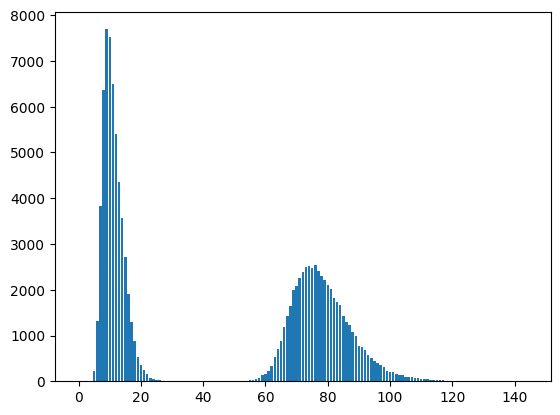

In [42]:
plt.bar(np.arange(145), np.bincount(tokenizedDataLengths))

In [67]:
a = np.arange(-1, 99).reshape(10, 10)

In [69]:
a

array([[-1,  0,  1,  2,  3,  4,  5,  6,  7,  8],
       [ 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
       [19, 20, 21, 22, 23, 24, 25, 26, 27, 28],
       [29, 30, 31, 32, 33, 34, 35, 36, 37, 38],
       [39, 40, 41, 42, 43, 44, 45, 46, 47, 48],
       [49, 50, 51, 52, 53, 54, 55, 56, 57, 58],
       [59, 60, 61, 62, 63, 64, 65, 66, 67, 68],
       [69, 70, 71, 72, 73, 74, 75, 76, 77, 78],
       [79, 80, 81, 82, 83, 84, 85, 86, 87, 88],
       [89, 90, 91, 92, 93, 94, 95, 96, 97, 98]])

In [71]:
list(map(lambda x: tokenizer.decode(x), map(lambda x: x[x != -1], a)))

['! # $ % & ( ) * +',
 ', - . / 0 1 2 3 4 5',
 '6 7 8 9 : ; = ? @ A',
 'B C D E F G H I J K',
 'L M N O P Q R S T U',
 'V W X Y Z [ \\ ] ^ _',
 'a b c d e f g h i j',
 'k l m n o p q r s t',
 'u v w x y z ~ \x96 £ ¥',
 '° ² ³ µ º ½ À Á Ç É']

In [6]:
np.vstack((np.zeros((2, 80)), np.zeros((3, 80)))).shape

(5, 80)

## Experimenting with onehot 

In [1]:
import tensorflow as tf

In [9]:
batchSize = 1300

In [37]:
a = np.random.randint(0, 1300, (1300, 1))

In [38]:
a.shape

(1300, 1)

In [43]:
columns = tf.cast(tf.reshape(a, (-1)), tf.int32)
rows = tf.range(0, batchSize)

positions = tf.cast(tf.stack((rows, columns), 1), tf.int64)

In [47]:
values = tf.ones_like(rows, tf.uint8)

In [48]:
oneHot = tf.SparseTensor(positions, values, (batchSize, 30003))

In [49]:
oneHot

SparseTensor(indices=tf.Tensor(
[[   0 1142]
 [   1  974]
 [   2  346]
 ...
 [1297  653]
 [1298  823]
 [1299 1238]], shape=(1300, 2), dtype=int64), values=tf.Tensor([1 1 1 ... 1 1 1], shape=(1300,), dtype=uint8), dense_shape=tf.Tensor([ 1300 30003], shape=(2,), dtype=int64))